In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')  # importing csv file
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### EDA

In [3]:
train.isnull().sum()   # checking null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

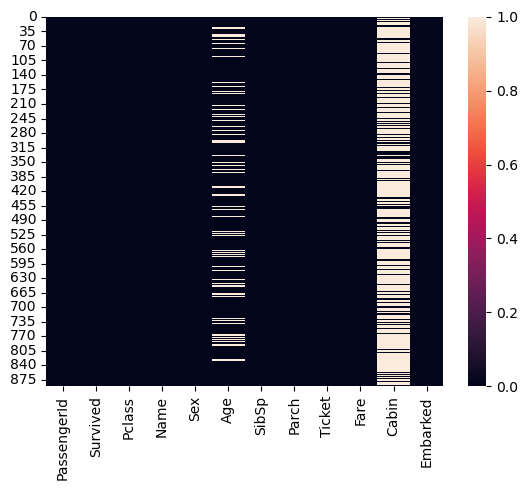

In [4]:
sns.heatmap(train.isnull())   # checking null values in heatmap

around 20 percent age data is missing , cabin more than 50 percent of data is missing , firstly we have to handle missing value of age fillna function 

# Statistical Summary

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Removing null value

In [6]:
train['Age'].fillna(train['Age'].median(), inplace = True)    

In [7]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [8]:
train['Cabin'].fillna(train['Cabin'].mode()[0], inplace = True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

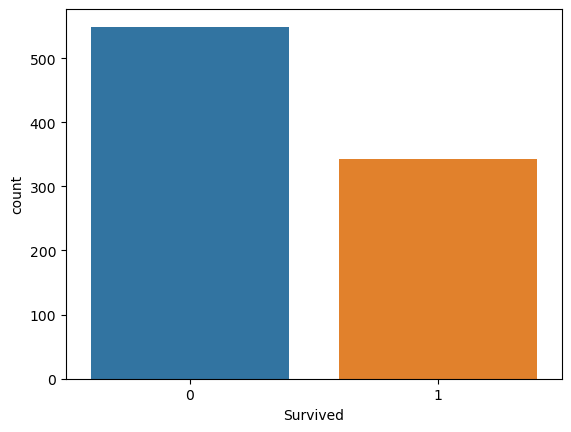

In [10]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

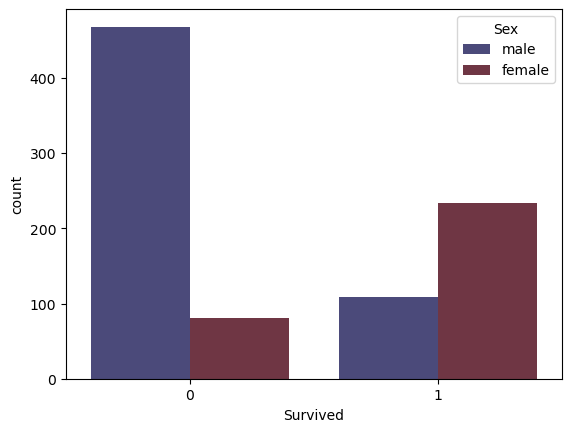

In [11]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='icefire')

<AxesSubplot:xlabel='Survived', ylabel='count'>

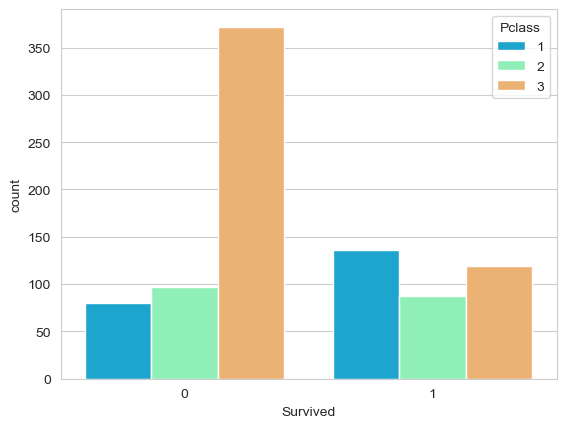

In [12]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')


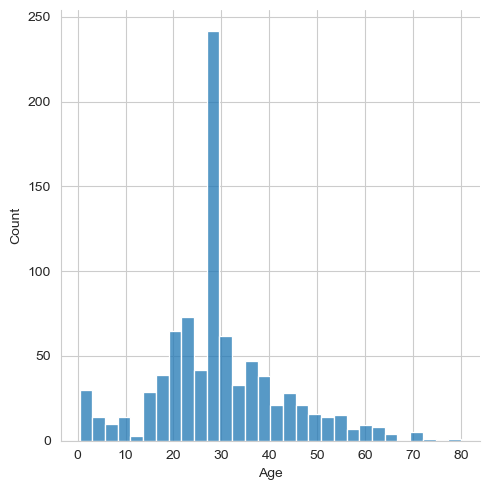

In [13]:
sns.displot(train['Age'],bins=30)

<AxesSubplot:>

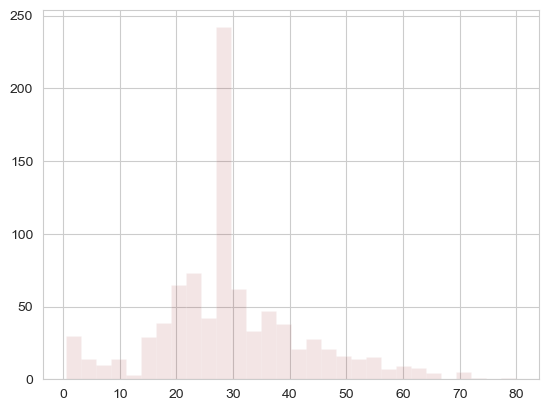

In [14]:
train['Age'].hist(bins=30,color='darkred',alpha=0.1)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

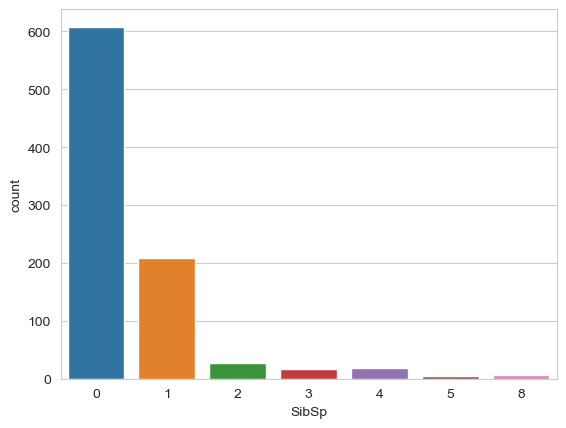

In [15]:
sns.countplot(x='SibSp',data=train)


<AxesSubplot:>

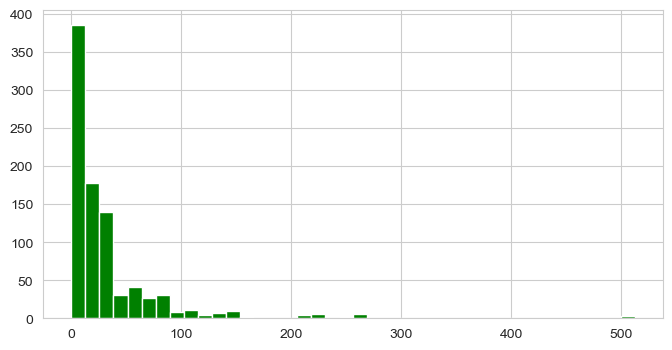

In [16]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

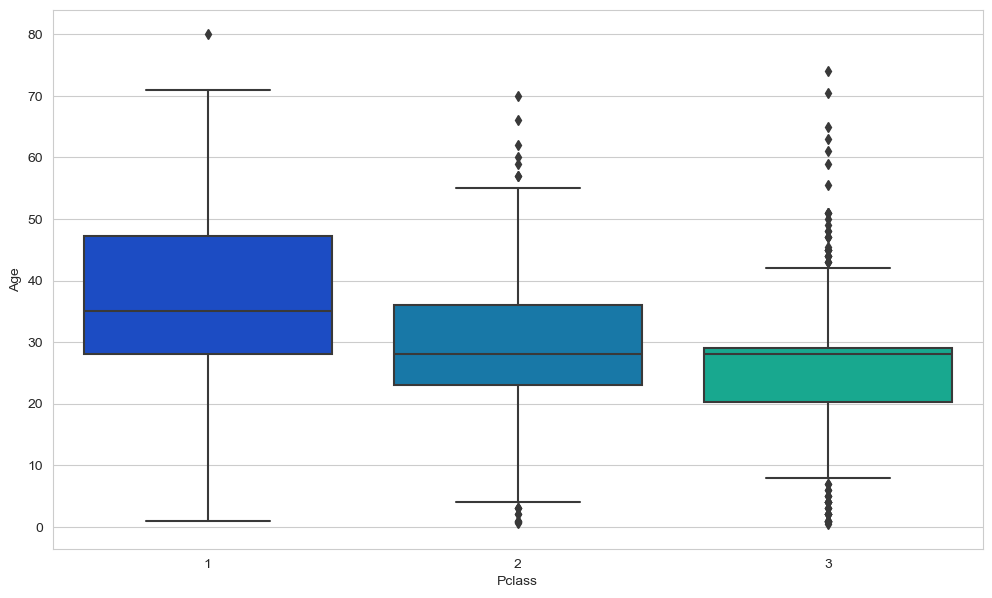

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<AxesSubplot:>

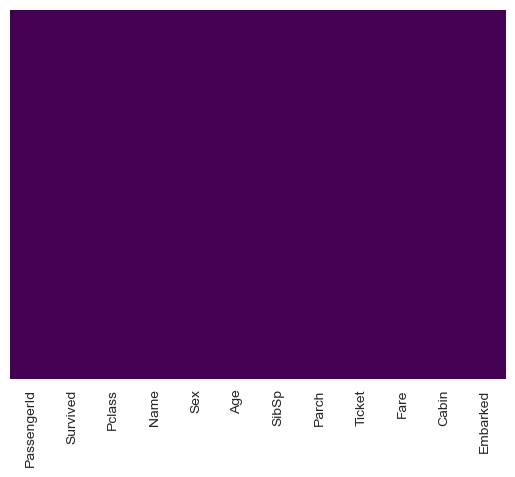

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
sex = pd.get_dummies(train['Sex'],drop_first=False)
embark = pd.get_dummies(train['Embarked'],drop_first=False)

In [21]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [22]:
train = pd.concat([train,sex,embark],axis=1)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [24]:
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [25]:
embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


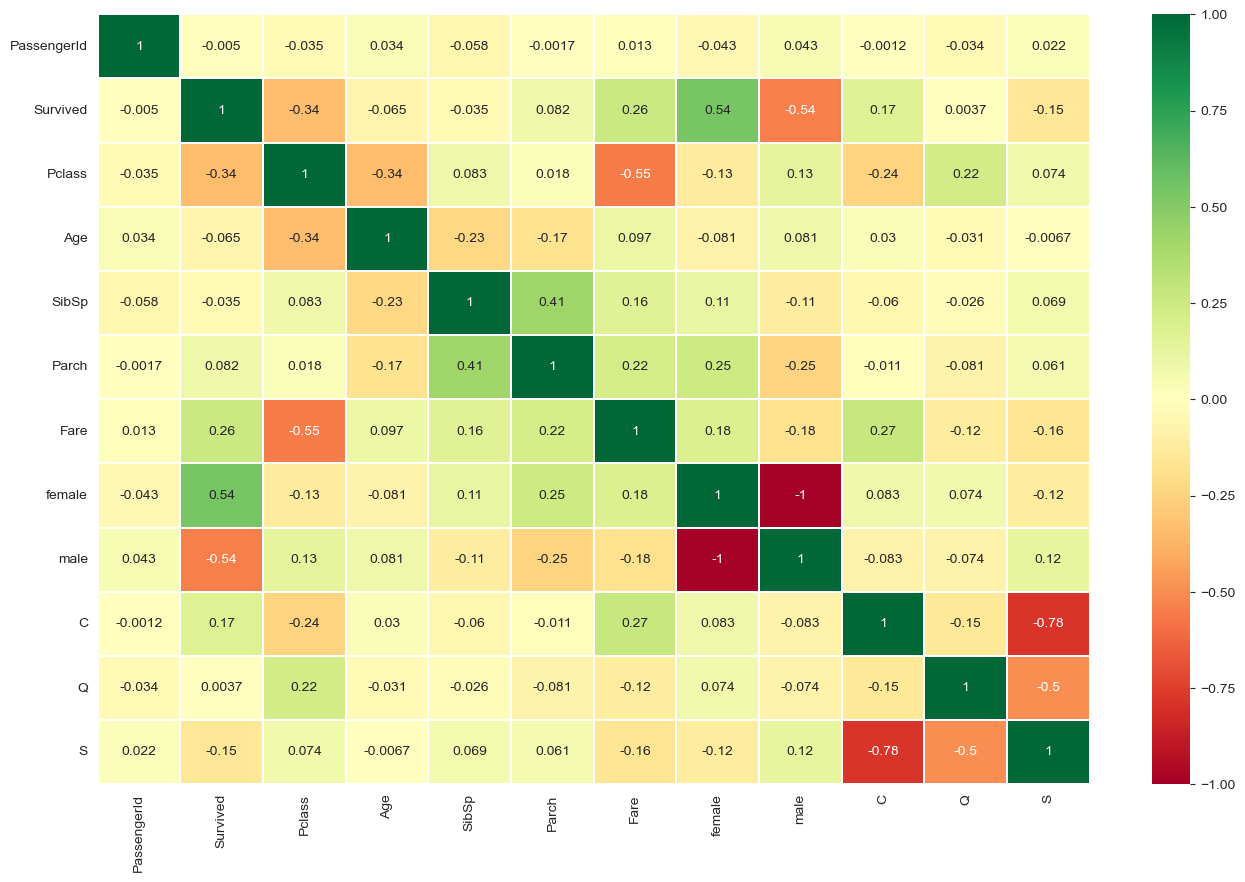

In [26]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()


### TRAIN TEST SPLIT

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=45)

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression(max_iter= 5000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [31]:
predictions = lr.predict(X_test)

In [32]:
lr.score(X_test,y_test)

0.8208955223880597

#### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
predlo=dt.predict(X_test)

In [34]:
dt.score(X_test,y_test)

0.75

### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predlr = dt.predict(X_test)
rfc.score(X_test,y_test)

0.8619402985074627

### Support Vector File

In [36]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
predlr = svc.predict(X_test)
svc.score(X_test,y_test)

0.6865671641791045

In [37]:
result = rfc.score(X_test,y_test)
print(result*100)

86.19402985074626


#### Saving Model

In [38]:
import joblib
joblib.dump(rfc,'titanic_survived.obj')

['titanic_survived.obj']